In [1]:
import matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tigramite import plotting
%config InlineBackend.figure_formats = ['svg']

In [2]:
def scale_font(scaling=1):
    axs = plt.gcf().get_axes()
    for ax in axs:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels() + ax._children):
            if hasattr(item, "set_fontsize"): item.set_fontsize(scaling*item.get_fontsize())
plt.scale_font = scale_font

## Methods - SCM, Time Series Graph and Collapsed Graph

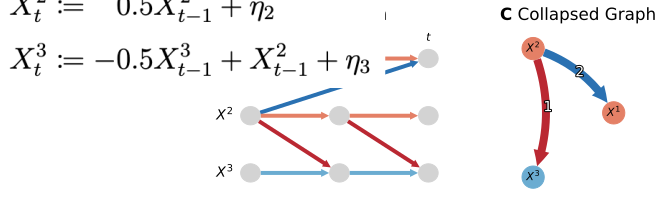

In [195]:
graph = np.full((3, 3, 3), "", dtype="<U3")
graph[0, 0, 1] = graph[1, 1, 1] = graph[2, 2, 1] = "-->"
graph[1, 0, 2] = "-->"
graph[1, 2, 1] = "-->"
varnames = [fr"$X^{i}$" for i in range(1, 4)]

val_matrix = np.zeros(graph.shape)
val_matrix[0, 0, 1] = val_matrix[1, 1, 1] = 0.5
val_matrix[2, 2, 1] = -0.5
val_matrix[1, 0, 2] = -0.75
val_matrix[1, 2, 1] = 0.75

scm = ["$X^1 \coloneq f_1(X^1, \eta_1)$", r"$X^2 \coloneq f_2(X^1, X^2, X^3, \eta_2)$", r"$X^3 \coloneq f_3(X^3, \eta_3)$"]

fig, axs = plt.subplots(1, 3, figsize=(11, 3), width_ratios=[1.5, 2, 1])

axs[0].set_title(r"$\bf{A}$ SCM", ha="left", x=0, pad=10)
axs[0].axis("off")
im = plt.imread("../thesis/img/smc_inset.png")
fig.figimage(im, 0, 160)

axs[1].set_title(r"$\bf{B}$ Time Series Graph", ha="left", x=-0.04, pad=10)
plotting.plot_time_series_graph(graph=graph, val_matrix=val_matrix, curved_radius=0, node_size=0.16, var_names=varnames, fig_ax=(fig, axs[1]), node_aspect=None)
axs[1].set_xlim([-0.15, 1.2])
axs[1].set_ylim([-0.2, 1.25])
axs[1].child_axes[0].remove()
for text in axs[1]._children[-3:]:
    text._y = 0.92
for text in axs[1]._children[-6:-3]:
    text._x = 0.04

axs[2].set_title(r"$\bf{C}$ Collapsed Graph", ha="left", x=0, pad=10)
plotting.plot_graph(graph=graph, val_matrix=val_matrix, var_names=varnames, fig_ax=(fig, axs[2]), node_aspect=None, node_label_size=8, show_colorbar=False)
axs[2].set_xlim(axs[2].get_ylim())

plt.scale_font(1.4)
plt.savefig("../thesis/img/scm_dag_example.png", dpi=200, bbox_inches="tight")
plt.show()

## Methods - Fold Bifurcation

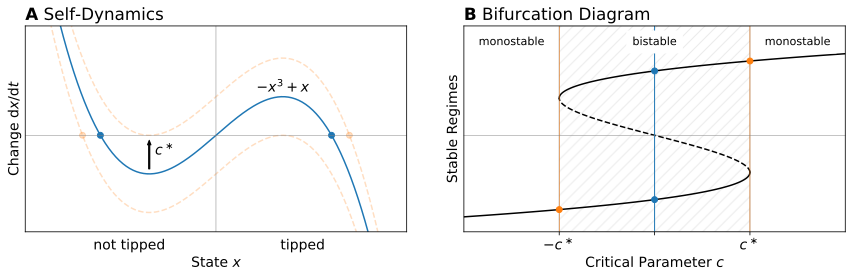

In [70]:
x = np.linspace(-1.5, 1.5, 200)
c  = (4/27)**0.5
xc = 1/3**0.5

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title(r"$\bf{A}$ Self-Dynamics", x=0, ha="left")
axs[0].plot(x, -x**3 + x)
axs[0].plot(x, -x**3 + x + c, ls="--", alpha=0.25, c="C1")
axs[0].plot(x, -x**3 + x - c, ls="--", alpha=0.25, c="C1")
axs[0].scatter([-1, 1], [0, 0], c="C0")
axs[0].scatter([-2/3**0.5, 2/3**0.5], [0, 0], c="C1", alpha=0.25)
axs[0].arrow(-xc, -c + 0.05, 0, c - 0.1, length_includes_head=True, width=0.01, color="black")
axs[0].text(-xc + 0.05, -0.5*c, r"$c^\ast$")
axs[0].set_xticks([-0.75, 0.75], ["not tipped", "tipped"])
axs[0].set_yticks([])
axs[0].tick_params(bottom=False)
axs[0].set_ylim([-2.5*c, 1.7/1.5*2.5*c])
axs[0].axvline(0, lw=0.5, c="gray")
axs[0].axhline(0, lw=0.5, c="gray")
axs[0].set_xlabel(r"State $x$")
axs[0].set_ylabel(r"Change d$x$/d$t$")
axs[0].text(xc, c + 0.05, r"$-x^3 + x$", ha="center")

axs[1].set_title(r"$\bf{B}$ Bifurcation Diagram", x=0, ha="left")
axs[1].add_patch(matplotlib.patches.Rectangle((-c, -1.5), 2*c, 1.7 + 1.5, fill=None, hatch="//", alpha=0.3, zorder=-99))
x = np.linspace(-1.5, -xc, 100)
axs[1].plot(x**3 - x, x, c="black")
x = np.linspace(-xc, xc, 100)
axs[1].plot(x**3 - x, x, c="black", ls="--")
x = np.linspace(xc, 1.5, 100)
axs[1].plot(x**3 - x, x, c="black")
axs[1].set_xlim([-2*c, 2*c])
axs[1].set_ylim([-1.5, 1.7])
axs[1].set_xticks([-c, 0, c], [r"$-c^\ast$", "", r"$c^\ast$"])
axs[1].set_yticks([])
axs[1].axvline(0, lw=1, c="C0")
axs[1].scatter([0, 0], [-1, 1], c="C0", zorder=99)
axs[1].axvline(-c, lw=0.5, c="C1")
axs[1].axvline(c, lw=0.5, c="C1")
axs[1].scatter([-c, c], [-2/3**0.5, 2/3**0.5], c="C1", zorder=99)
axs[1].axhline(0, lw=0.5, c="gray")
axs[1].set_xlabel(r"Critical Parameter $c$")
axs[1].set_ylabel("Stable Regimes")
for x, text in zip([-1.5*c, 0, 1.5*c], ["monostable", "bistable", "monostable"]):
    text = axs[1].text(x, 1.45, text, ha="center", va="center", fontsize=8) 
    text.set_backgroundcolor("white")

plt.scale_font(1.4)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.savefig("../thesis/img/bifurcation.png", dpi=200)
plt.show()

## Methods - Violations of Assumptions

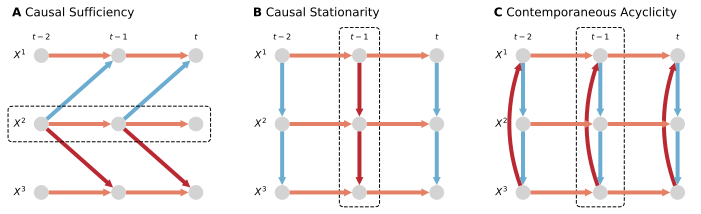

In [66]:
graph = np.full((3, 3, 3), "", dtype="<U3")
graph[0, 0, 1] = graph[1, 1, 1] = graph[2, 2, 1] = "-->"
graph[1, 0, 1] = "-->"
graph[1, 2, 1] = "-->"
varnames = [fr"$X^{i}$" for i in range(1, 4)]

val_matrix = np.zeros(graph.shape)
val_matrix[0, 0, 1] = val_matrix[1, 1, 1] = val_matrix[2, 2, 1] = 0.5
val_matrix[1, 0, 1] = -0.5
val_matrix[1, 2, 1] =  0.75

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

# causal sufficiency
axs[0].set_title(r"$\bf{A}$ Causal Sufficiency", x=-0.075, ha="left", pad=25)
plotting.plot_time_series_graph(graph, val_matrix, var_names=varnames, curved_radius=0, fig_ax=(fig, axs[0]))
xlim = axs[0].get_xlim()
ylim = axs[0].get_ylim()
blurbox = axs[0].add_patch(matplotlib.patches.FancyBboxPatch((-0.185, 0.5-0.1), 1.25, 0.2, boxstyle="round, pad=0.03", ls="--", facecolor="none", transform=axs[0].transData, zorder=99, clip_on=False))
axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)

# causal stationarity
graph = np.full((3, 3, 3), "", dtype="<U3")
graph[0, 0, 1] = graph[1, 1, 1] = graph[2, 2, 1] = "-->"
graph[0, 1, 0] = graph[1, 2, 0] = "-->"
graph[1, 0, 0] = graph[2, 1, 0] = "<--"

val_matrix = np.zeros(graph.shape)
val_matrix[0, 0, 1] = val_matrix[1, 1, 1] = val_matrix[2, 2, 1] = 0.5
val_matrix[0, 1, 0] = val_matrix[1, 0, 0] = -0.5
val_matrix[1, 2, 0] = val_matrix[2, 1, 0] = -0.5

axs[1].set_title(r"$\bf{B}$ Causal Stationarity", x=-0.075, ha="left", pad=25)
plotting.plot_time_series_graph(graph, val_matrix, var_names=varnames, curved_radius=0, fig_ax=(fig, axs[1]))
axs[1]._children[28].set(facecolor=(0.7284890426758939, 0.15501730103806227, 0.1973856209150327, 1.0))
axs[1]._children[43].set(facecolor=(0.7284890426758939, 0.15501730103806227, 0.1973856209150327, 1.0))
ylim = axs[1].get_ylim()
axs[1].add_patch(matplotlib.patches.FancyBboxPatch((0.5 - 0.1, -0.075), 0.2, 1.25, boxstyle="round, pad=0.03", ls="--", facecolor="none", transform=axs[1].transData, zorder=-99, clip_on=False))
axs[1].set_ylim(ylim)

# contemporaneous acyclicity
graph[2, 0, 0] = "-->"
graph[0, 2, 0] = "<--"
val_matrix[2, 0, 0] = val_matrix[0, 2, 0] = 0.75

axs[2].set_title(r"$\bf{C}$ Contemporaneous Acyclicity", x=-0.075, ha="left", pad=25)
plotting.plot_time_series_graph(graph, val_matrix, var_names=varnames, fig_ax=(fig, axs[2]))
ylim = axs[2].get_ylim()
axs[2].add_patch(matplotlib.patches.FancyBboxPatch((0.5 - 0.25/2, -0.075), 0.25, 1.25, boxstyle="round, pad=0.03", ls="--", facecolor="none", transform=axs[2].transData, zorder=-99, clip_on=False))
axs[2].set_ylim(ylim)

for ax in axs:
    if len(ax.child_axes) > 0:
        ax.child_axes[0].remove()

plt.savefig("../thesis/img/assumptions.png", dpi=200, bbox_inches="tight")
plt.show()
    
blurbox.set(facecolor="#00ff00")
fig.savefig("../thesis/img/assumptions_mask.png", dpi=200, bbox_inches="tight")

In [67]:
im = plt.imread("../thesis/img/assumptions.png")

im_mask = plt.imread("../thesis/img/assumptions_mask.png")
im_mask = im_mask = (im_mask[:,:,0] == 0) & (im_mask[:,:,1] == 1)
im_mask = np.dstack(4*[im_mask])

blur = np.where(im_mask, im, np.ones_like(im))
blur = sp.ndimage.gaussian_filter(blur, (5, 5, 0))

matplotlib.image.imsave("../thesis/img/assumptions.png", np.where(im_mask, blur, im))